In [111]:
from math import pi, sqrt
import matplotlib.pyplot as plt
import numpy as np
import photutils.aperture as ap
from rich import print
import pandas as pd

import pol_model as plm

# The simulation of symmetrical PSF

In [166]:
# Create a model and generate some data
m1 = plm.GaussModel(a=500, sx=5, theta=pi/3, ratio=1.0)
x, y, m1_data = plm.Model2Data(m1, 0, 200, 0, 100, noise=10)
print('1:', m1)

1: Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude x_mean y_mean x_stddev y_stddev       theta       
    --------- ------ ------ -------- -------- ------------------
        500.0   50.0   50.0      5.0      5.0 1.0471975511965976

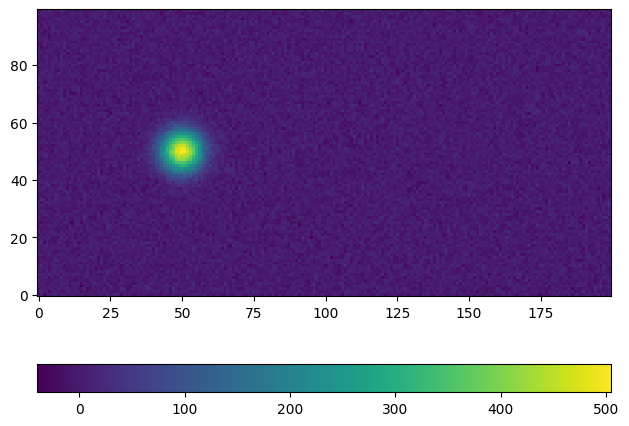

In [167]:
fig, ax = plt.subplots(1)

cb0 = ax.imshow(m1_data, origin='lower', interpolation='nearest',
        #    extent=(x.min(), x.max(), y.min(), y.max())
           )
plt.colorbar(cb0, ax=ax, orientation='horizontal')
plt.tight_layout()
plt.savefig('figs/model1.png', facecolor='white')
plt.show()

## Prepearing the annual aperure

Annulus apperture:
 Aperture: CircularAnnulus
positions: [[50., 50.]]
r_in: 20.0
r_out: 30.0

Phot annulus:
    id  xcenter  ycenter  aperture_sum  aperture_area  aperture_mean
0   1     50.0     50.0    -39.499907    1570.796327      -0.025146

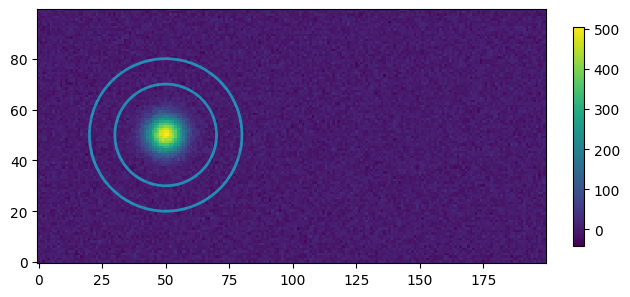

In [168]:
positions = [(m1.x_mean.value, m1.y_mean.value)]

# Annulus aperture
r_in = 20
dr = 10
annulus_aperture = ap.CircularAnnulus(positions, r_in=r_in, r_out=r_in + dr)
phot_annulus = ap.aperture_photometry(m1_data, annulus_aperture)
phot_annulus["aperture_area"] = annulus_aperture.area
phot_annulus["aperture_mean"] = phot_annulus["aperture_sum"] / annulus_aperture.area
print("Annulus apperture:\n", annulus_aperture)
print("Phot annulus:\n", phot_annulus.to_pandas())

fig = plt.figure()
ax = fig.add_subplot(111)

cb = ax.imshow(
    m1_data,
    origin="lower",
    interpolation="nearest",
    # extent=(x.min(), x.max(), y.min(), y.max()),
)
annulus_aperture.plot(color="cyan", lw=2, alpha=0.5)
plt.colorbar(cb, ax=ax, fraction=0.02)
plt.tight_layout()
plt.show()

## Prepare circular apertures

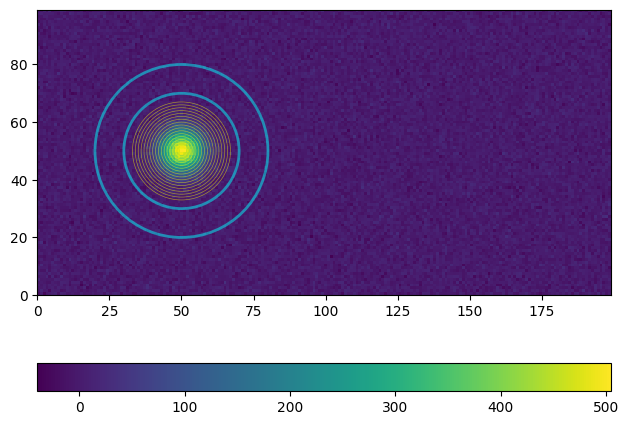

In [169]:
fig = plt.figure()
ax = fig.add_subplot(111)

cb = ax.imshow(m1_data, origin='lower', interpolation='nearest',
              extent=(x.min(), x.max(), y.min(), y.max())
              )
annulus_aperture.plot(color='cyan', lw=2, alpha=0.5)

# Circular aperture
max_rad = 18
apertures = []
for r in np.arange(1, max_rad, 1):
    aperture = ap.CircularAperture(positions, r)
    apertures.append(aperture)
    aperture.plot(color='yellow', lw=0.5, alpha=0.5)

phot_source = ap.aperture_photometry(m1_data, apertures).to_pandas()
apertures_area = [aperture.area for aperture in apertures]

# plt.colorbar(cb, ax=ax, fraction=0.02)
plt.colorbar(cb, ax=ax, orientation='horizontal')
plt.tight_layout()
plt.savefig('figs/model1_apertures.png', facecolor='white')
plt.show()

In [170]:
cond = [x.startswith('aperture_sum') for x in phot_source.columns]
phot_columns = phot_source.columns[cond]
xs = np.array([aperture.r for aperture in apertures], dtype=float)
ys = phot_source.loc[0, phot_columns].values


## The Gaussian growing function

In [171]:
def Gauss_grow_asymmetry(x, a, stddev_x, stddev_y):
    return a * (1.0 - np.exp(-x**2 / (2 * stddev_x * stddev_y)))

def Gauss_grow_symmetry(x, a, stddev):
    return a * (1.0 - np.exp(-x**2 / (2 * stddev**2)))

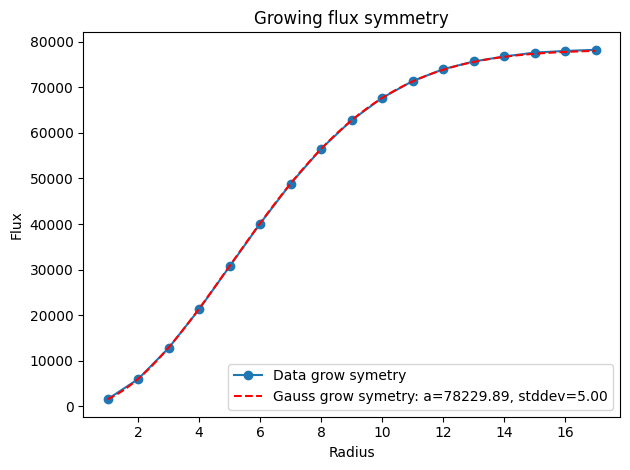

In [172]:
plt.plot(xs, ys, 'o-', label='Data grow symetry')

xx = np.linspace(min(radius), max(radius), 100)
a = max(ys)

plt.plot(xx, Gauss_grow_symmetry(xx, a, m1.x_stddev.value), 'r--', 
label=f'Gauss grow symetry: a={a:.2f}, stddev={m1.x_stddev.value:.2f}')
plt.xlabel('Radius')
plt.ylabel('Flux')
plt.title('Growing flux symmetry')
plt.legend()
plt.tight_layout()
plt.savefig('figs/model1_growing_symmetry.png', facecolor='white')
plt.show()

# The simulation of asymmetrical PSF

In [174]:
# Create a model and generate some data
m1 = plm.GaussModel(a=500, sx=5, theta=pi/3, ratio=0.8)
x, y, m1_data = plm.Model2Data(m1, 0, 200, 0, 100, noise=10)
print('1:', m1)

1: Model: Gaussian2D
Inputs: ('x', 'y')
Outputs: ('z',)
Model set size: 1
Parameters:
    amplitude x_mean y_mean x_stddev y_stddev       theta       
    --------- ------ ------ -------- -------- ------------------
        500.0   50.0   50.0      5.0      4.0 1.0471975511965976

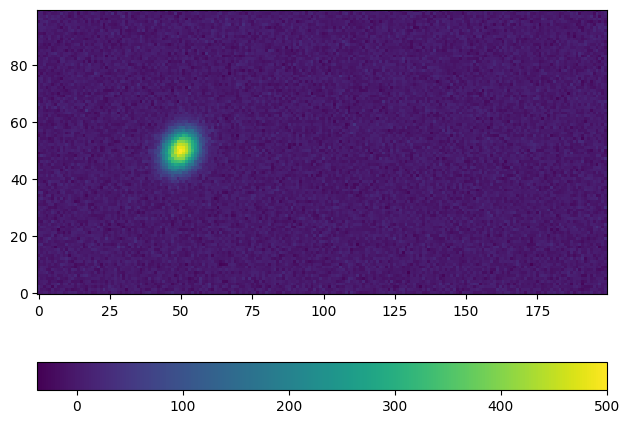

In [175]:
fig, ax = plt.subplots(1)

cb0 = ax.imshow(m1_data, origin='lower', interpolation='nearest',
        #    extent=(x.min(), x.max(), y.min(), y.max())
           )
plt.colorbar(cb0, ax=ax, orientation='horizontal')
plt.tight_layout()
plt.savefig('figs/model2.png', facecolor='white')
plt.show()

## Prepearing the annual aperure

Annulus apperture:
 Aperture: CircularAnnulus
positions: [[50., 50.]]
r_in: 20.0
r_out: 30.0

Phot annulus:
    id  xcenter  ycenter  aperture_sum  aperture_area  aperture_mean
0   1     50.0     50.0    -56.280112    1570.796327      -0.035829

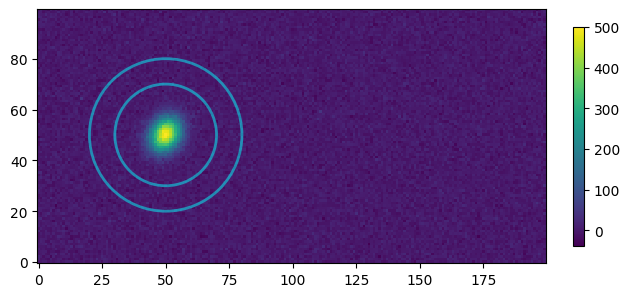

In [176]:
positions = [(m1.x_mean.value, m1.y_mean.value)]

# Annulus aperture
r_in = 20
dr = 10
annulus_aperture = ap.CircularAnnulus(positions, r_in=r_in, r_out=r_in + dr)
phot_annulus = ap.aperture_photometry(m1_data, annulus_aperture)
phot_annulus["aperture_area"] = annulus_aperture.area
phot_annulus["aperture_mean"] = phot_annulus["aperture_sum"] / annulus_aperture.area
print("Annulus apperture:\n", annulus_aperture)
print("Phot annulus:\n", phot_annulus.to_pandas())

fig = plt.figure()
ax = fig.add_subplot(111)

cb = ax.imshow(
    m1_data,
    origin="lower",
    interpolation="nearest",
    # extent=(x.min(), x.max(), y.min(), y.max()),
)
annulus_aperture.plot(color="cyan", lw=2, alpha=0.5)
plt.colorbar(cb, ax=ax, fraction=0.02)
plt.tight_layout()
plt.show()

## Prepare circular apertures

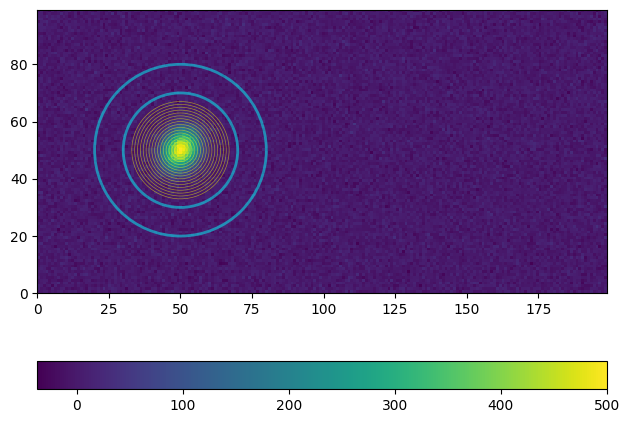

In [177]:
fig = plt.figure()
ax = fig.add_subplot(111)

cb = ax.imshow(m1_data, origin='lower', interpolation='nearest',
              extent=(x.min(), x.max(), y.min(), y.max())
              )
annulus_aperture.plot(color='cyan', lw=2, alpha=0.5)

# Circular aperture
max_rad = 18
apertures = []
for r in np.arange(1, max_rad, 1):
    aperture = ap.CircularAperture(positions, r)
    apertures.append(aperture)
    aperture.plot(color='yellow', lw=0.5, alpha=0.5)

phot_source = ap.aperture_photometry(m1_data, apertures).to_pandas()
apertures_area = [aperture.area for aperture in apertures]

# plt.colorbar(cb, ax=ax, fraction=0.02)
plt.colorbar(cb, ax=ax, orientation='horizontal')
plt.tight_layout()
plt.savefig('figs/model1_apertures.png', facecolor='white')
plt.show()

In [178]:
cond = [x.startswith('aperture_sum') for x in phot_source.columns]
phot_columns = phot_source.columns[cond]
xs = np.array([aperture.r for aperture in apertures], dtype=float)
ys = phot_source.loc[0, phot_columns].values


## The Gaussian growing function

In [179]:
def Gauss_grow_asymmetry(x, a, stddev_x, stddev_y):
    return a * (1.0 - np.exp(-x**2 / (2 * stddev_x * stddev_y)))

def Gauss_grow_symmetry(x, a, stddev):
    return a * (1.0 - np.exp(-x**2 / (2 * stddev**2)))

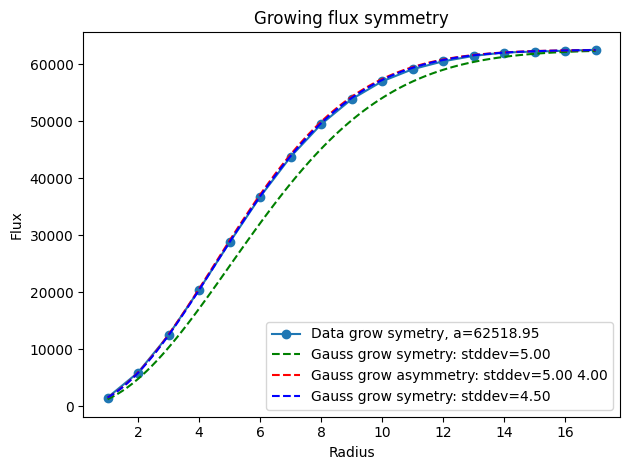

In [189]:
plt.plot(xs, ys, "o-", label=f"Data grow symetry, a={a:.2f}")

xx = np.linspace(min(radius), max(radius), 100)
a = max(ys)
yy = Gauss_grow_asymmetry(xx, a, m1.x_stddev.value, m1.y_stddev.value)
yy2 = Gauss_grow_symmetry(xx, a, m1.x_stddev.value)
yy3 = Gauss_grow_symmetry(xx, a, (m1.x_stddev.value + m1.y_stddev.value)/2)

plt.plot(
    xx, yy2, "g--",
    label=f"Gauss grow symetry: stddev={m1.x_stddev.value:.2f}",
)
plt.plot(
    xx, yy, "r--",
    label=f"Gauss grow asymmetry: stddev={m1.x_stddev.value:.2f} {m1.y_stddev.value:.2f}",
)
plt.plot(
    xx, yy3, "b--",
    label=f"Gauss grow symetry: stddev={(m1.x_stddev.value + m1.y_stddev.value)/2:.2f}",
)



plt.xlabel("Radius")
plt.ylabel("Flux")
plt.title("Growing flux symmetry")
plt.legend()
plt.tight_layout()
plt.savefig("figs/model2_growing_asymmetry.png", facecolor="white")
plt.show()